Contents Based Filtering

GMM(em)

In [1]:
# 1.1 data analysis and wrangling
import numpy as np
import pandas as pd
# 1.2정규분포
from scipy.stats import norm
import scipy as sp
import sklearn
# 2.1 visualization
import matplotlib.pyplot as plt
# 2.2 visualization
import seaborn as sns

In [2]:
# load data
df_ratings=pd.read_csv('ratings.csv')
df_genre = pd.read_csv('movies.csv')
# data merge
df_movies = pd.merge(df_ratings, df_genre, on=['movieId'], how='left')

In [3]:
# 장르별 rating 뽑는 함수
def get_user_ratings(ratings, movies, genre):
    genre_ratings = pd.DataFrame()
    genre_movies = movies[movies['genres'].str.contains(genre)]
    genre_ratings = pd.concat([genre_ratings, genre_movies['userId'], genre_movies['rating']], axis=1)
    return genre_ratings

1. user-based recommendation

영화 추천을 예시로 들어보면, 먼저 사용자에 대해서 성별, 연령대, 지역 등의 프로필을 작성할 수 있습니다.

나와 프로필이 비슷한 다른 사용자가 선호하는 영화를 추천해주는 방식입니다.

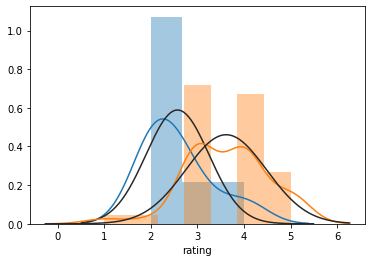

In [13]:
reX = get_user_ratings(df_ratings, df_movies, 'Drama')
reX.replace(np.nan, 0, inplace=True)
for i in range(1, 3):
    diX = reX.loc[reX.userId == i]
    sns.distplot(diX.iloc[:,1], fit=norm)
plt.show()

In [15]:
# 표준편차 == scale
re = []
array = reX.loc[reX.userId == 1].values.tolist()
for j in array:
    re.append(j[1])
avg = sum(re)/len(re)
rv = norm(loc=avg, scale=np.std(re))

print(avg, np.std(re))

2.5714285714285716 0.6776309271789385


In [19]:
b = []
for i in range(1, 671):
    diX = reX.loc[reX.userId == i].values.tolist()
    a = []
    for j in diX:
        a.append(j[1])
    b.append([i, sum(a)/len(a), np.std(a)])
b = np.array(b)
b

array([[  1.        ,   2.57142857,   0.67763093],
       [  2.        ,   3.61538462,   0.86574067],
       [  3.        ,   3.92      ,   0.71665891],
       ...,
       [668.        ,   4.30769231,   0.82131371],
       [669.        ,   3.41666667,   0.7592028 ],
       [670.        ,   3.76470588,   1.26162415]])

In [17]:
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=7, max_iter=20, random_state=0)
y_pred = em.fit_predict(b[:, 1:])

In [18]:
# userid 와 cluster match
xy_pred=[]
x_pred = (b[:, :1])
for i in range(len(x_pred)):
    xy_pred.append([int(x_pred.tolist()[i][0]),y_pred[i]])

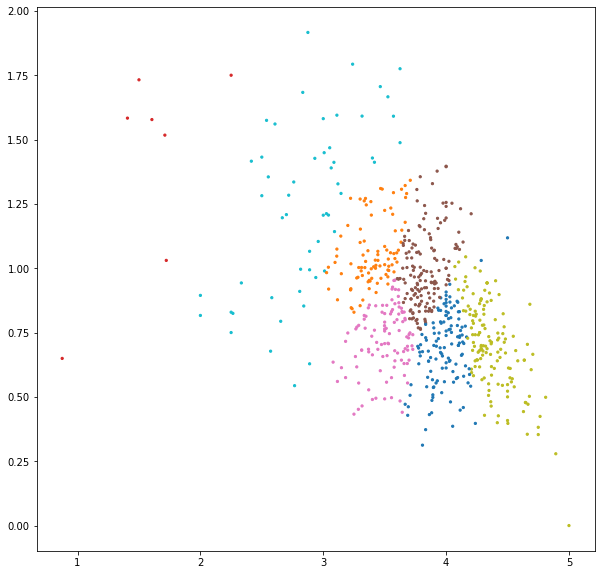

array([6, 4, 0, 5, 0, 1, 4, 3, 0, 0, 0, 6, 0, 6, 6, 0, 3, 4, 3, 6, 3, 1,
       3, 0, 1, 4, 3, 5, 6, 0, 5, 3, 1, 0, 6, 0, 5, 5, 3, 5, 0, 0, 1, 1,
       6, 5, 0, 4, 3, 4, 3, 3, 6, 3, 4, 1, 5, 3, 1, 5, 1, 0, 3, 5, 5, 3,
       5, 4, 5, 5, 5, 4, 4, 0, 6, 0, 1, 5, 6, 3, 0, 5, 3, 0, 6, 3, 6, 4,
       5, 0, 5, 1, 0, 3, 0, 0, 6, 5, 1, 4, 0, 0, 3, 0, 4, 3, 1, 4, 5, 0,
       1, 5, 5, 5, 0, 3, 0, 5, 3, 1, 5, 4, 1, 4, 5, 4, 0, 3, 0, 4, 5, 5,
       6, 0, 4, 1, 3, 4, 3, 1, 1, 6, 3, 3, 3, 4, 5, 0, 4, 1, 3, 1, 5, 0,
       3, 5, 4, 4, 4, 0, 4, 3, 3, 0, 6, 0, 5, 1, 5, 6, 5, 0, 5, 4, 3, 1,
       0, 4, 0, 1, 5, 3, 5, 3, 3, 5, 3, 3, 6, 0, 4, 0, 5, 4, 1, 0, 0, 1,
       4, 1, 3, 0, 0, 3, 1, 4, 2, 0, 4, 4, 5, 4, 6, 5, 0, 5, 3, 0, 1, 3,
       6, 5, 5, 5, 0, 4, 6, 0, 0, 5, 0, 3, 4, 5, 5, 0, 1, 4, 0, 0, 1, 5,
       4, 6, 3, 4, 3, 5, 5, 5, 5, 4, 3, 4, 3, 4, 3, 5, 3, 1, 3, 6, 4, 5,
       0, 3, 0, 3, 1, 0, 0, 0, 5, 4, 5, 6, 5, 4, 1, 5, 0, 1, 3, 1, 1, 1,
       5, 3, 0, 5, 5, 0, 1, 4, 0, 5, 0, 5, 5, 0, 3,

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(b[:, 1], b[:, 2], cmap="tab10", s=5, c=y_pred)
plt.show()
# 내가 드라마 10개에 점수를 준거를
# 평균, 표준편차를 구함 => 이걸 그래프로 그림
y_pred

2. item-based recommendation

영화는 장르, 출연하는 배우들, 흥행 여부 등의 프로필을 작성할 수 있습니다.

이를 기반으로 특정 영화를 좋아했던 사용자에게 비슷한 영화를 추천합니다. 

In [ ]:
# movieid로 정렬
df_movies = df_movies.sort_values(["movieId"])

In [ ]:
def get_user_ratings(ratings, movies, genre):
    genre_ratings = pd.DataFrame()
    genre_movies = movies[movies['genres'].str.contains(genre)]
    genre_ratings = pd.concat([genre_ratings, genre_movies['movieId'], genre_movies['rating']], axis=1)
    return genre_ratings

In [ ]:
reX = get_user_ratings(df_ratings, df_movies, 'Western')
reX.replace(np.nan, 0, inplace=True)

In [ ]:
b = []
for i in sorted(set(reX.movieId)):
    diX = reX.loc[reX.movieId == i].values.tolist()
    a = []
    for j in diX:
        a.append(j[1])
    b.append([i, sum(a)/len(a), np.std(a)])
b = np.array(b)

In [ ]:
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=10, max_iter=20, random_state=0)
y_pred = em.fit_predict(b[:, 1:])

In [ ]:
xy_pred=[]
x_pred = (b[:, :1])
for i in range(len(x_pred)):
    xy_pred.append([int(x_pred.tolist()[i][0]),y_pred[i]])

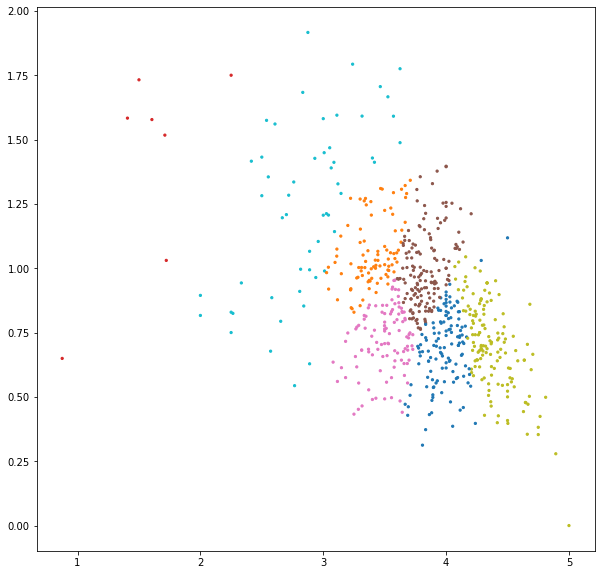

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(b[:, 1], b[:, 2], cmap="tab10", s=5, c=y_pred)
plt.show()

In [ ]:
모든 영화 &&